In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Incident ID,Status,Category,KM number,Alert Status,# Reassignments,...,# Related Interactions,Related Interaction,# Related Incidents,# Related Changes,Related Change,CI Name (CBy),CI Type (CBy),CI Subtype (CBy),ServiceComp WBS (CBy),Priority
0,SBA000607,application,Server Based Application,WBS000263,IM0040983,Closed,incident,KM0001106,closed,3.0,...,1.0,SD0125294,1.0,NaN,NaN,SBA000607,application,Server Based Application,WBS000263,4
1,SBA000017,application,Server Based Application,WBS000099,IM0040946,Closed,incident,KM0000480,closed,1.0,...,1.0,SD0125217,NaN,NaN,NaN,SSW000101,software,System Software,#N/B,3
2,DSK000005,computer,Desktop,WBS000091,IM0040982,Closed,incident,KM0001446,closed,3.0,...,1.0,SD0125291,NaN,NaN,NaN,DSK000184,computer,Desktop,WBS000091,5
3,SBA000317,application,Server Based Application,WBS000048,IM0040981,Closed,incident,KM0000310,closed,0.0,...,1.0,SD0125287,NaN,NaN,NaN,SBA000317,application,Server Based Application,WBS000048,5
4,WBA000133,application,Web Based Application,WBS000073,IM0040945,Closed,incident,KM0001931,closed,0.0,...,1.0,SD0125189,NaN,NaN,NaN,WBA000133,application,Web Based Application,WBS000073,5


In [3]:
train.columns

Index(['CI Name (aff)', 'CI Type (aff)', 'CI Subtype (aff)',
       'Service Component WBS (aff)', 'Incident ID', 'Status', 'Category',
       'KM number', 'Alert Status', '# Reassignments', 'Open Time',
       'Reopen Time', 'Resolved Time', 'Close Time', 'Handle Time (Hours)',
       'Closure Code', '# Related Interactions', 'Related Interaction',
       '# Related Incidents', '# Related Changes', 'Related Change',
       'CI Name (CBy)', 'CI Type (CBy)', 'CI Subtype (CBy)',
       'ServiceComp WBS (CBy)', 'Priority'],
      dtype='object')

In [4]:
Incident_ID = test['Incident ID'].copy()   # for final submission
type(Incident_ID)

pandas.core.series.Series

## Some EDA

In [5]:
for col in train.columns:
    print('{} - {} '.format(col, train[col].nunique()) )

CI Name (aff) - 2858 
CI Type (aff) - 13 
CI Subtype (aff) - 62 
Service Component WBS (aff) - 269 
Incident ID - 40607 
Status - 2 
Category - 4 
KM number - 1758 
Alert Status - 1 
# Reassignments - 41 
Open Time - 30025 
Reopen Time - 2041 
Resolved Time - 29358 
Close Time - 30127 
Handle Time (Hours) - 27997 
Closure Code - 14 
# Related Interactions - 47 
Related Interaction - 37400 
# Related Incidents - 22 
# Related Changes - 4 
Related Change - 211 
CI Name (CBy) - 3256 
CI Type (CBy) - 14 
CI Subtype (CBy) - 59 
ServiceComp WBS (CBy) - 269 
Priority - 5 


In [6]:
train.groupby('CI Type (aff)').agg({'Priority':['count', 'median', 'mean', 'std']})

Priority                           
                        count median      mean       std
CI Type (aff)                                           
Phone                       2    2.5  2.500000  0.707107
application             28786    4.0  4.216494  0.709811
applicationcomponent        5    3.0  3.200000  0.447214
computer                 3212    5.0  4.175903  1.064067
database                  173    3.0  3.184971  0.494628
displaydevice             180    4.0  4.038889  0.220813
hardware                  350    4.0  3.971429  0.917381
networkcomponents          93    3.0  3.311828  0.908636
no type                   111    5.0  4.243243  0.955522
officeelectronics         133    4.0  3.984962  0.728063
software                  275    3.0  3.625455  0.720963
storage                   589    4.0  3.803056  0.706089
subapplication           6698    4.0  4.185428  0.505856

In [7]:
train.groupby('CI Subtype (aff)').agg({'Priority':['count', 'median', 'mean', 'std']})

Priority                           
                                   count median      mean       std
CI Subtype (aff)                                                   
Application Server                     1    4.0  4.000000       NaN
Automation Software                   45    4.0  3.977778  0.398228
Banking Device                       826    3.0  2.897094  0.952351
Citrix                               693    4.0  3.940837  0.365757
Client Based Application             466    4.0  3.991416  0.528674
Controller                           125    3.0  3.032000  0.251960
DataCenterEquipment                  223    3.0  3.699552  0.941701
Database                             170    3.0  3.158824  0.453205
Database Software                      4    3.0  3.250000  0.500000
Desktop                              372    5.0  4.798387  0.440164
Desktop Application                 3394    4.0  4.119918  0.734039
ESX Cluster                           10    5.0  4.300000  0.948683
ESX Server                             1    3.0  3.000000       NaN
Encryption                            38    4.0  4.026316  0.366639
Exchange                             118    5.0  4.771186  0.590683
Firewall                               2    3.0  3.000000  0.000000
IPtelephony                            2    4.5  4.500000  0.707107
Instance                               2    4.5  4.500000  0.707107
Iptelephony                            1    5.0  5.000000       NaN
KVM Switches                          24    5.0  5.000000  0.000000
Keyboard                              24    5.0  5.000000  0.000000
Laptop                              1678    5.0  4.747914  0.551665
Lines                                 10    4.0  4.000000  0.816497
Linux Server                          48    5.0  4.104167  0.972813
MQ Queue Manager                       4    3.0  3.000000  0.000000
MigratieDummy                         40    4.0  4.200000  0.757865
Modem                                  3    5.0  4.666667  0.577350
Monitor                              180    4.0  4.038889  0.220813
Neoview Server                         1    4.0  4.000000       NaN
Net Device                            10    3.0  3.400000  0.516398
...                                  ...    ...       ...       ...
NonStop Server                        13    3.0  3.461538  0.776250
Number                                 2    2.5  2.500000  0.707107
Omgeving                              78    4.0  3.935897  0.405794
Oracle Server                          2    4.0  4.000000  1.414214
Printer                               84    4.0  4.392857  0.515258
RAC Service                            1    5.0  5.000000       NaN
Router                                12    3.0  2.833333  0.834847
SAN                                  459    4.0  4.015251  0.638799
SAP                                 1075    5.0  4.890233  0.354602
Scanner                               49    3.0  3.285714  0.456435
Security Software                      1    3.0  3.000000       NaN
Server Based Application           16324    4.0  4.218513  0.761667
SharePoint Farm                        9    4.0  4.222222  0.440959
Standard Application                  79    3.0  3.734177  0.827552
Switch                                24    3.0  3.125000  1.075922
System Software                      224    3.0  3.566964  0.754643
Thin Client                            5    4.0  4.000000  0.000000
UPS                                    1    4.0  4.000000       NaN
Unix Server                            6    5.0  4.500000  0.836660
VDI                                    7    4.0  3.714286  0.755929
VMWare                                 1    3.0  3.000000       NaN
Virtual Tape Server                    1    5.0  5.000000       NaN
Web Based Application              13326    4.0  4.188804  0.534791
Windows Server                       135    4.0  3.614815  0.791609
Windows Server in extern beheer        1    5.0  5.000000       NaN
X86 Server          

In [8]:
train[['Open Time', 'Close Time', 'Resolved Time']].head(10)

,Open Time,Close Time,Resolved Time
0,04-03-2014 09:17,12-03-2014 11:27,12-03-2014 11:27
1,04-03-2014 09:13,04-03-2014 09:15,NaN
2,04-03-2014 09:11,14-03-2014 10:26,14-03-2014 10:26
3,04-03-2014 09:08,04-03-2014 09:45,04-03-2014 09:45
4,04-03-2014 09:06,31-03-2014 10:29,31-03-2014 10:29
5,04-03-2014 09:05,04-03-2014 12:21,04-03-2014 12:21
6,04-03-2014 09:05,04-03-2014 11:19,04-03-2014 11:18
7,04-03-2014 09:03,04-03-2014 13:53,04-03-2014 13:53
8,04-03-2014 08:58,10-03-2014 08:05,10-03-2014 08:05
9,04-03-2014 08:56,04-03-2014 14:31,04-03-2014 14:29


In [9]:
print(train['Status'].unique())
print(test['Status'].unique())

['Closed' 'Work in progress']
['Closed']


In [10]:
train.groupby('Closure Code').agg({'Priority':['count', 'mean', 'std']}) 

Priority                    
                                count      mean       std
Closure Code                                             
Data                             1892  4.172833  0.711945
Hardware                         2617  4.172717  0.958611
Inquiry                           152  4.565789  0.594356
Kwaliteit van de output             9  5.000000  0.000000
No error - works as designed     3101  4.296034  0.666779
Operator error                   1382  4.075977  0.579034
Other                           14427  4.329798  0.692437
Overig                              1  5.000000       NaN
Questions                         125  4.880000  0.350115
Referred                          136  3.985294  0.759974
Software                        11361  4.113634  0.626322
Unknown                          1379  4.176940  0.703932
User error                       2973  3.869492  0.747216
User manual not used              650  4.364615  0.676010

In [11]:
print(train['Category'].unique())
print(test['Category'].unique())
train.groupby('Category')['Priority'].count()

['incident' 'request for information' 'complaint' 'request for change']
['incident' 'request for information' 'complaint']


Category
complaint                     10
incident                   32668
request for change             1
request for information     7928
Name: Priority, dtype: int64

In [12]:
print(train['Alert Status'].unique())
print(test['Alert Status'].unique())

['closed']
['closed']


In [13]:
print(np.sort(train['# Reassignments'].unique()))
print(np.sort(test['# Reassignments'].unique()))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 29. 30. 31. 32. 33. 34. 36. 37.
 38. 39. 42. 45. 46. nan]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17]


In [14]:
train.groupby('# Reassignments')['Priority'].mean()

# Reassignments
0.0     4.139205
1.0     4.089410
2.0     4.388702
3.0     4.278056
4.0     4.407227
5.0     4.221068
6.0     4.395548
7.0     4.264026
8.0     4.369099
9.0     4.251534
10.0    4.374101
11.0    4.315789
12.0    4.327273
13.0    4.442623
14.0    4.428571
15.0    4.256410
16.0    4.391304
17.0    4.307692
18.0    4.357143
19.0    4.300000
20.0    4.571429
21.0    4.545455
22.0    4.100000
23.0    4.400000
24.0    4.333333
25.0    4.200000
26.0    4.285714
27.0    5.000000
29.0    5.000000
30.0    4.333333
31.0    5.000000
32.0    4.666667
33.0    3.666667
34.0    5.000000
36.0    3.000000
37.0    5.000000
38.0    5.000000
39.0    5.000000
42.0    5.000000
45.0    5.000000
46.0    5.000000
Name: Priority, dtype: float64

In [15]:
train[['Open Time', 'Close Time']].tail()

,Open Time,Close Time
40602,10-08-2012 11:01,08-11-2013 13:55
40603,17-07-2012 11:49,14-11-2013 09:31
40604,29-03-2012 12:36,13-01-2014 15:13
40605,12-03-2012 15:44,02-12-2013 12:36
40606,05-02-2012 13:32,04-11-2013 13:51


In [16]:
print(train['KM number'].unique() [:10])
print(test['KM number'].unique() [:10])

['KM0001106' 'KM0000480' 'KM0001446' 'KM0000310' 'KM0001931' 'KM0002043'
 'KM0000940' 'KM0001569' 'KM0001596' 'KM0001145']
['KM0000182' 'KM0000846' 'KM0001314' 'KM0001364' 'KM0000836' 'KM0001287'
 'KM0000315' 'KM0000917' 'KM0000583' 'KM0002360']


In [17]:
train.groupby('Related Interaction').agg({'Priority':['count','mean']})

Priority          
                       count      mean
Related Interaction                   
#MULTIVALUE             3103  4.216887
#N/B                     106  4.575472
SD0000007                  1  4.000000
SD0000011                  1  3.000000
SD0000017                  1  3.000000
SD0000025                  1  4.000000
SD0000029                  1  4.000000
SD0000031                  1  4.000000
SD0000033                  1  4.000000
SD0000034                  1  4.000000
SD0000036                  1  3.000000
SD0000037                  1  4.000000
SD0000040                  1  4.000000
SD0000042                  1  4.000000
SD0000043                  1  4.000000
SD0000045                  1  3.000000
SD0000046                  1  4.000000
SD0000053                  1  4.000000
SD0000055                  1  4.000000
SD0000058                  1  4.000000
SD0000063                  1  4.000000
SD0000065                  1  4.000000
SD0000068                  1  4.000000
SD0000072                  1  4.000000
SD0000073                  1  4.000000
SD0000074                  1  4.000000
SD0000076                  1  5.000000
SD0000081                  1  4.000000
SD0000082                  1  4.000000
SD0000085                  1  4.000000
...                      ...       ...
SD0125204                  1  4.000000
SD0125217                  1  3.000000
SD0125240                  1  4.000000
SD0125243                  1  4.000000
SD0125247                  1  4.000000
SD0125250                  1  4.000000
SD0125251                  1  4.000000
SD0125261                  1  5.000000
SD0125264                  1  3.000000
SD0125271                  1  4.000000
SD0125272                  1  5.000000
SD0125274                  1  5.000000
SD0125276                  1  5.000000
SD0125278                  1  5.000000
SD0125279                  1  4.000000
SD0125281                  1  4.000000
SD0125283                  1  5.000000
SD0125284                  1  4.000000
SD0125287                  1  5.000000
SD0125289                  1  3.000000
SD0125291                  1  5.000000
SD0125294                  1  4.000000
SD0125315                  1  5.000000
SD0125316                  1  2.000000
SD0125318                  1  5.000000
SD0125323                  1  4.000000
SD0125324                  1  3.000000
SD0125325                  1  5.000000
SD0125331                  1  4.000000
SD0125332                  1  5.000000

[37400 rows x 2 columns]

## Wrangling the Data

In [18]:
combined = [train, test]   # to ensure execution of same operations on both datasets 

In [19]:
print(len(train))
train.isna().sum()

40607


CI Name (aff)                      0
CI Type (aff)                      0
CI Subtype (aff)                   0
Service Component WBS (aff)        0
Incident ID                        0
Status                             0
Category                           0
KM number                          0
Alert Status                       0
# Reassignments                    1
Open Time                          0
Reopen Time                    38529
Resolved Time                   1580
Close Time                         0
Handle Time (Hours)                1
Closure Code                     402
# Related Interactions           106
Related Interaction                0
# Related Incidents            39620
# Related Changes              40075
Related Change                 40075
CI Name (CBy)                      0
CI Type (CBy)                      0
CI Subtype (CBy)                   0
ServiceComp WBS (CBy)              0
Priority                           0
dtype: int64

In [20]:
print(len(test))
test.isna().sum() 

5999


CI Name (aff)                     0
CI Type (aff)                     0
CI Subtype (aff)                  0
Service Component WBS (aff)       0
Incident ID                       0
Status                            0
Category                          0
KM number                         0
Alert Status                      0
# Reassignments                   0
Open Time                         0
Reopen Time                    5793
Resolved Time                   200
Close Time                        0
Handle Time (Hours)               0
Closure Code                     58
# Related Interactions            8
Related Interaction               0
# Related Incidents            5764
# Related Changes              5971
Related Change                 5971
CI Name (CBy)                     0
CI Type (CBy)                     0
CI Subtype (CBy)                  0
ServiceComp WBS (CBy)             0
dtype: int64

In [21]:
train.dropna(subset=['Handle Time (Hours)', '# Reassignments'], inplace=True)

In [22]:
for df in combined:
    df.drop(['Reopen Time', '# Related Incidents', '# Related Changes', 'Related Change'],
               inplace=True, axis=1)

    df['Closure Code'].fillna(value='Unknown' , inplace=True )

    df['# Related Interactions'].fillna(value=df['# Related Interactions'].median() , inplace=True)

    df.drop(['Resolved Time'], axis=1, inplace=True)

    df.drop(['Alert Status'], axis=1, inplace=True)

    df['Open Time'] = pd.to_datetime(df['Open Time'], dayfirst=True)
    df['Close Time'] = pd.to_datetime(df['Close Time'], dayfirst=True)
    df['Process Time'] = (df['Close Time'] - df['Open Time']).astype('timedelta64[h]')
    
    df.drop(['Open Time', 'Close Time'], inplace=True, axis=1)
    
    df.drop(['CI Name (CBy)', 'CI Type (CBy)', 'CI Subtype (CBy)', 'ServiceComp WBS (CBy)'],
               inplace=True, axis=1)
    
    df.drop(['Incident ID', 'CI Name (aff)'], inplace=True, axis=1)
    
    df.drop(['Status', 'Closure Code'], inplace=True, axis=1)

In [23]:
CI_Type_mapper = {'application':'application', 'computer':'computer', 'subapplication':'subapplication', 
                  'software':'other','database':'other', 'storage':'other', 'hardware':'other',
                  'officeelectronics':'other','networkcomponents':'other', 'displaydevice':'other',
                  'no type':'other','Phone':'other', 'applicationcomponent':'other'}

for df in combined:
    df['CI Type (aff)'] = df['CI Type (aff)'].map(CI_Type_mapper)

In [24]:
def Category_Mapper(category):
    if category=='incident':
        return 1
    else:
        return 0

for df in combined:
    df['Category'] = df['Category'].map(Category_Mapper)

In [25]:
subtype_count = train.groupby('CI Subtype (aff)')['Priority'].count()
SubtypeCount = pd.DataFrame(subtype_count)
SubtypeCount.reset_index(inplace=True)
SubtypeCount.columns = ['subtype', 'count']
Frequent_Subtypes = list(SubtypeCount[ SubtypeCount['count']>300]['subtype'])

def map_subtypes(subtype):
    if subtype not in Frequent_Subtypes:
        return 'Other'
    else:
        return subtype

for df in combined:
    df['CI Subtype (aff)'] = df['CI Subtype (aff)'].map(map_subtypes) 

In [26]:
for df in combined:
    df['KM number'] = df['KM number'].map(lambda x: int(x[-4:]))
    df['Service Component WBS (aff)'] = df['Service Component WBS (aff)'].map(lambda x: int(x[-3:]))

In [27]:
for df in combined:
    df.drop(['# Related Interactions', 'Related Interaction'], inplace=True, axis=1)

In [28]:
for df in combined:
    df.drop(['Handle Time (Hours)'], inplace=True, axis=1)

In [29]:
for df in combined:
    print(df.columns)

Index(['CI Type (aff)', 'CI Subtype (aff)', 'Service Component WBS (aff)',
       'Category', 'KM number', '# Reassignments', 'Priority', 'Process Time'],
      dtype='object')
Index(['CI Type (aff)', 'CI Subtype (aff)', 'Service Component WBS (aff)',
       'Category', 'KM number', '# Reassignments', 'Process Time'],
      dtype='object')


In [30]:
print(train['CI Type (aff)'].unique())
print(train['CI Subtype (aff)'].unique())
print(train['Service Component WBS (aff)'].nunique())
print(train['KM number'].nunique())
print(train['# Reassignments'].nunique())

['application' 'computer' 'subapplication' 'other']
['Server Based Application' 'Desktop' 'Web Based Application'
 'Desktop Application' 'SAP' 'Laptop' 'Banking Device' 'Citrix' 'Other'
 'SAN' 'Client Based Application']
269
1758
41


In [31]:
train.corr()

,Service Component WBS (aff),Category,KM number,# Reassignments,Priority,Process Time
Service Component WBS (aff),1.000000,-0.121418,0.031500,0.079764,0.030336,-0.004264
Category,-0.121418,1.000000,0.009412,-0.068834,-0.477990,-0.009762
KM number,0.031500,0.009412,1.000000,-0.031919,0.089313,-0.049121
# Reassignments,0.079764,-0.068834,-0.031919,1.000000,0.087058,0.366683
Priority,0.030336,-0.477990,0.089313,0.087058,1.000000,0.035395
Process Time,-0.004264,-0.009762,-0.049121,0.366683,0.035395,1.000000


In [32]:
train.dtypes

CI Type (aff)                   object
CI Subtype (aff)                object
Service Component WBS (aff)      int64
Category                         int64
KM number                        int64
# Reassignments                float64
Priority                         int64
Process Time                   float64
dtype: object

In [33]:
for df in combined:
    print(df.columns)

Index(['CI Type (aff)', 'CI Subtype (aff)', 'Service Component WBS (aff)',
       'Category', 'KM number', '# Reassignments', 'Priority', 'Process Time'],
      dtype='object')
Index(['CI Type (aff)', 'CI Subtype (aff)', 'Service Component WBS (aff)',
       'Category', 'KM number', '# Reassignments', 'Process Time'],
      dtype='object')


In [34]:
train_Type = pd.get_dummies(train['CI Type (aff)'],drop_first=True)
train_Subtype = pd.get_dummies(train['CI Subtype (aff)'],drop_first=True)
train = pd.concat([train, train_Type, train_Subtype], axis=1)
train.head()

,CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Category,KM number,# Reassignments,Priority,Process Time,computer,other,...,Citrix,Client Based Application,Desktop,Desktop Application,Laptop,Other,SAN,SAP,Server Based Application,Web Based Application
0,application,Server Based Application,263,1,1106,3.0,4,194.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,application,Server Based Application,99,1,480,1.0,3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,computer,Desktop,91,1,1446,3.0,5,241.0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,application,Server Based Application,48,1,310,0.0,5,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,application,Web Based Application,73,1,1931,0.0,5,649.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
test_Type = pd.get_dummies(test['CI Type (aff)'],drop_first=True)
test_Subtype = pd.get_dummies(test['CI Subtype (aff)'],drop_first=True)
test = pd.concat([test, test_Type, test_Subtype], axis=1)
test.head()

,CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Category,KM number,# Reassignments,Process Time,computer,other,subapplication,Citrix,Client Based Application,Desktop,Desktop Application,Laptop,Other,SAN,SAP,Server Based Application,Web Based Application
0,other,Other,267,1,182,0,5.0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,application,Web Based Application,318,1,846,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,application,Server Based Application,73,1,1314,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,application,Server Based Application,73,1,1364,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,application,Web Based Application,318,1,836,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
combined = [train, test]
for df in combined:
    print(df.columns)

Index(['CI Type (aff)', 'CI Subtype (aff)', 'Service Component WBS (aff)',
       'Category', 'KM number', '# Reassignments', 'Priority', 'Process Time',
       'computer', 'other', 'subapplication', 'Citrix',
       'Client Based Application', 'Desktop', 'Desktop Application', 'Laptop',
       'Other', 'SAN', 'SAP', 'Server Based Application',
       'Web Based Application'],
      dtype='object')
Index(['CI Type (aff)', 'CI Subtype (aff)', 'Service Component WBS (aff)',
       'Category', 'KM number', '# Reassignments', 'Process Time', 'computer',
       'other', 'subapplication', 'Citrix', 'Client Based Application',
       'Desktop', 'Desktop Application', 'Laptop', 'Other', 'SAN', 'SAP',
       'Server Based Application', 'Web Based Application'],
      dtype='object')


In [37]:
for df in combined:
    df.drop(['CI Type (aff)', 'CI Subtype (aff)'], inplace=True, axis=1)
    print(df.columns)

Index(['Service Component WBS (aff)', 'Category', 'KM number',
       '# Reassignments', 'Priority', 'Process Time', 'computer', 'other',
       'subapplication', 'Citrix', 'Client Based Application', 'Desktop',
       'Desktop Application', 'Laptop', 'Other', 'SAN', 'SAP',
       'Server Based Application', 'Web Based Application'],
      dtype='object')
Index(['Service Component WBS (aff)', 'Category', 'KM number',
       '# Reassignments', 'Process Time', 'computer', 'other',
       'subapplication', 'Citrix', 'Client Based Application', 'Desktop',
       'Desktop Application', 'Laptop', 'Other', 'SAN', 'SAP',
       'Server Based Application', 'Web Based Application'],
      dtype='object')


## Applying CLassification Algorithms

In [38]:
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\rafe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
np.set_printoptions(precision=2)
def findaccuracy(FeatList, Label):
    Accuracies = []
    
    GNB, MNB, KNN, SVM= GaussianNB(), MultinomialNB(), KNeighborsClassifier(), LinearSVC()
    GB, RF, AB = GradientBoostingClassifier(), RandomForestClassifier(), AdaBoostClassifier()
    
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(FeatList, Label)
    
    AlgoList = [GNB, KNN, SVM, GB, RF, AB]
    AlgoNames = ['GNB', 'KNN', 'SVM', 'GB', 'RF', 'AB']
    for i in range(len(AlgoList)):
        AlgoList[i].fit(Xtrain, Ytrain)
        Ymodel = AlgoList[i].predict(Xtest)
        accuracy = accuracy_score(Ytest, Ymodel)*100
        print(AlgoNames[i],  ': ', accuracy)
        print()
        Accuracies.append(accuracy)
    return Accuracies

In [40]:
Features = train.drop('Priority', axis=1)
Label = train['Priority']

In [41]:
Accuracy_unprocessed = findaccuracy(Features, Label)

GNB :  57.407407407407405

KNN :  82.30890464933019

SVM :  8.993301812450749

GB :  83.7076438140268

RF :  88.1107171000788

AB :  23.886918833727343



In [42]:
train_normalized = MinMaxScaler().fit(Features).transform(Features)
test_normalizedr = MinMaxScaler().fit(Features).transform(test)

train_standardized = StandardScaler().fit(Features).transform(Features)
test_standerdized = StandardScaler().fit(Features).transform(test)

In [43]:
Accuracy_normalized = findaccuracy(train_normalized, Label)

GNB :  28.99921197793538

KNN :  87.63790386130812

SVM :  69.39519306540583

GB :  84.14105594956659

RF :  87.39164696611506

AB :  28.772655634357765



In [44]:
Accuracy_standardized= findaccuracy(train_standardized, Label)

GNB :  28.516548463356973

KNN :  84.52521670606778

SVM :  69.52324665090622

GB :  83.79629629629629

RF :  87.66745468873128

AB :  30.437352245862886



Random Forest is performing better. Now, we'll try to tune some hyperparameters.

### Towards Finalizing Model

In [45]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.3, random_state=101)

# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
confusion_matrix(y_test,preds)

array([[   0,    0,    1,    1,    0],
       [   0,  107,   34,   44,   12],
       [   0,   38, 1255,  299,   92],
       [   0,   37,  219, 5384,  270],
       [   0,    6,   88,  439, 3856]], dtype=int64)

In [73]:
print('Accuracy: ', accuracy_score(y_test,preds))
print('Precision Score: ', precision_score(y_test,preds, average='micro'))
print('Recall Score: ', recall_score(y_test,preds, average='micro'))
print('f1 Score: ', f1_score(y_test,preds, average='micro'))

Accuracy:  0.870300443276966
Precision Score:  0.870300443276966
Recall Score:  0.870300443276966
f1 Score:  0.870300443276966


In [63]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         2
          2       0.57      0.54      0.56       197
          3       0.79      0.75      0.77      1684
          4       0.87      0.91      0.89      5910
          5       0.91      0.88      0.89      4389

avg / total       0.87      0.87      0.87     12182



C:\Users\rafe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
model.feature_importances_

array([0.21, 0.16, 0.31, 0.04, 0.15, 0.02, 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.02, 0.01, 0.  , 0.01, 0.01, 0.04])

In [50]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

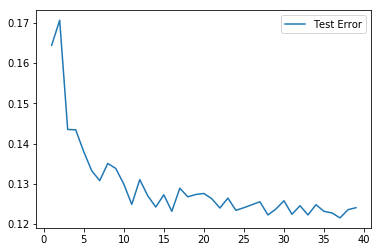

In [51]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

### Final Predictions

In [64]:
RFC = RandomForestClassifier(n_estimators=16,max_features='auto',random_state=101)
RFC.fit(Features,Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [65]:
Predictions = RFC.predict(test)

In [66]:
RFC.feature_importances_

array([0.21, 0.16, 0.3 , 0.04, 0.15, 0.02, 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.03])

In [67]:
type(Predictions), len(Predictions)

(numpy.ndarray, 5999)

In [68]:
Incident_ID = pd.DataFrame(Incident_ID)
Incident_ID.head()

,Incident ID
0,IM0047057
1,IM0047051
2,IM0047053
3,IM0047052
4,IM0047050


In [69]:
Predictions = pd.DataFrame(Predictions)
Predictions.head()

,0
0,3
1,4
2,4
3,4
4,5


In [71]:
Submission = pd.concat([Incident_ID, Predictions], axis=1)
Submission.columns = ['Incident ID', 'Priority']
Submission.head()

,Incident ID,Priority
0,IM0047057,3
1,IM0047051,4
2,IM0047053,4
3,IM0047052,4
4,IM0047050,5


In [72]:
Submission.to_csv('Shaikh_Rafe_Submission.csv', index=False)